# Práctica inicial 
## TP integrador - Primera parte
### EDA inicial - Obras Públicas (Dataset Provincia Bs. As)
#### Grupo_08 - Septiembre 2020

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_csv('observatorio-de-obras-urbanas.csv')

In [7]:
# Como siempre vemos las dimensiones e imprimimos las primeras líneas
print(f'Tamaño del dataset: {np.shape(obras)}')
obras.head()

Tamaño del dataset: (1117, 36)


,id,entorno,nombre,etapa,tipo,area_responsable,descripcion,monto_contrato,comuna,barrio,...,beneficiarios,mano_obra,compromiso,destacada,ba_elige,link_interno,pliego_descarga,expediente-numero,estudio_ambiental_descarga,financiamiento
0,1,Plan 54 escuelas,Escuela de Educación Primaria N.° 24 D.E. 15 «...,Finalizada,Escuelas,Ministerio de Educación,Primaria,67065700.0,12.0,Villa Urquiza,...,NaN,NaN,NaN,SI,NaN,https://www.buenosaires.gob.ar/baobras/54-escu...,https://buenosaires.gob.ar/areas/planeamiento_...,914412-MDUGC-2013,NaN,NaN
1,2,Donado Holmberg,Calle Holmberg: Nivelación en cruce,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,En el marco del proyecto urbano del Barrio Par...,9950017.0,12.0,Villa Urquiza,...,NaN,16.0,NaN,NaN,NaN,https://www.buenosaires.gob.ar/baobras/Donado-...,https://www.buenosaires.gov.ar/areas/planeamie...,5515928/2014,NaN,NaN
2,3,Área Ambiental Central,Área Ambiental Central: Calles Alsina Y Moreno,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,Se intervinieron los tramos comprendidos entre...,36942632.0,1.0,Montserrat,...,NaN,55.0,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/area-am...,https://www.buenosaires.gov.ar/areas/planeamie...,NaN,NaN,NaN
3,4,Área Ambiental Central,Área Ambiental Central: Calle Esmeralda I,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,La obra incluyó el tramo ubicado entre la Av. ...,26938294.0,1.0,San Nicolás,...,NaN,59.0,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/area-am...,https://www.buenosaires.gov.ar/areas/planeamie...,NaN,NaN,NaN
4,5,Villa Olímpica,Villa Olímpica: Demoliciones en el Parque de l...,Finalizada,Vivienda,Secretaría de Transporte y Obras Públicas,Se realizó las demoliciones de las construccio...,6990315.0,8.0,Villa Soldati,...,NaN,NaN,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/villa-o...,https://www.buenosaires.gov.ar/areas/planeamie...,13793268/DGPUYA/2014,NaN,NaN


## Objetivo del Proyecto:
### Predicción en función del barrio y el tipo de obra a realizar, el monto del contrato

#### Primera parte, EDA y pre-procesamiento de datos

In [10]:
# Procedemos a visualizar correctamente todas las columnas del dataset y guardamos en una variable llamada columnas
columnas = obras.columns
columnas

Index(['id', 'entorno', 'nombre', 'etapa', 'tipo', 'area_responsable',
       'descripcion', 'monto_contrato', 'comuna', 'barrio', 'direccion', 'lat',
       'lng', 'fecha_inicio', 'fecha_fin_inicial', 'plazo_meses',
       'porcentaje_avance', 'imagen_1', 'imagen_2', 'imagen_3', 'imagen_4',
       'licitacion_oferta_empresa', 'licitacion_anio', 'contratacion_tipo',
       'nro_contratacion', 'cuit_contratista', 'beneficiarios', 'mano_obra',
       'compromiso', 'destacada', 'ba_elige', 'link_interno',
       'pliego_descarga', 'expediente-numero', 'estudio_ambiental_descarga',
       'financiamiento'],
      dtype='object')

In [12]:
# Queremos conocer si alguna de las columnas posee valores nulos.
# En caso de ser variables de interés, procederemos a explorarlas
obras.isnull().sum()



id                               0
entorno                          2
nombre                           0
etapa                            0
tipo                             0
area_responsable                 0
descripcion                     38
monto_contrato                  70
comuna                           7
barrio                           6
direccion                       99
lat                              9
lng                              9
fecha_inicio                    51
fecha_fin_inicial               30
plazo_meses                    100
porcentaje_avance                0
imagen_1                        49
imagen_2                       451
imagen_3                       664
imagen_4                       825
licitacion_oferta_empresa       72
licitacion_anio                358
contratacion_tipo              778
nro_contratacion               874
cuit_contratista               328
beneficiarios                  922
mano_obra                      864
compromiso          

## Variables de interés a analizar:
- Etapa
- Tipo
- Monto del contrato
- Barrio
- Latitud
- Longitud

### Etapa

In [14]:
# En primer lugar, analizaremos la feature "etapa"
# Comenzaremos analizando cómo vienen dados los valores, para ver si es necesario procesarlos
etapas= len(obras['etapa'].unique()) 
print(f'En total hay {etapas} etapas de obras."\r\n')
print("\n", obras['etapa'].unique())

En total hay 5 etapas de obras."


 ['Finalizada' 'En ejecución' 'En proyecto' 'En licitación' 'En Ejecución']


In [21]:
# Agruparemos en ejecución y en proyecto, ya que para el caso, pueden ser consideradas similares:

def clean_row(row):
    a= ['En ejecución','En proyecto','En Ejecución']
    
    if row.etapa in a:
        return 'En ejecución'
    return row.etapa

def clean_df(obras):
    obras_cleaned=obras.copy()
    obras_cleaned['etapa']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras)
print(obras_cleaned.etapa.unique())

# Con esto ya queda ok, porque como vimos antes, no hay ninguna sample sin estapa

['Finalizada' 'En ejecución' 'En licitación']


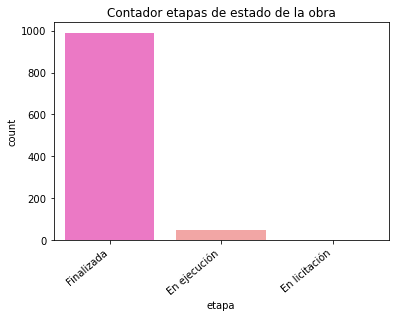

In [137]:
# Visualizamos rápidamente con un countplot

ax = sns.countplot(x='etapa', 
                   data=obras_cleaned, 
                   palette='spring',
                   alpha=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Contador etapas de estado de la obra')
plt.show()

# Vemos que el grueso de los samples ya están finalizados

### Tipo

In [22]:
# Analizamos la cantidad de valores únicos en el feature de tipo de obra
tipos_obras = len(obras['tipo'].unique()) 
print(f'En total hay {tipos_obras} tipos de obras."\r\n')
print("\n", obras['tipo'].unique())

En total hay 7 tipos de obras."


 ['Escuelas' 'Espacio Público' 'Vivienda' 'Hidráulica e Infraestructura'
 'Arquitectura' 'Transporte' 'Salud']


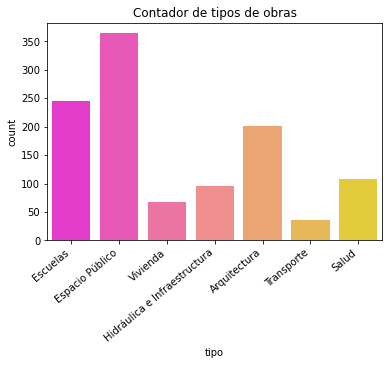

In [136]:
# En este caso no es necesario re agrupar los valores únicos
# Y tampoco se requiere de análisis de NaNs, pero vamos a graficar para comenzar a visualizar:
ax = sns.countplot(x='tipo', 
                   data=obras,
                   palette='spring')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Contador de tipos de obras")
plt.show()

### Monto del contrato 

In [49]:
# Para esta feature, nos interesan más los datos descriptivos de los valores registrados

obras_cleaned['monto_contrato'].describe().astype('int')

# Nuestro valor máximo es negativo?? Está chequeado?

count          1047
mean       54435039
std       233990588
min           47514
25%         1760971
50%         6495745
75%        24848133
max     -2147483648
Name: monto_contrato, dtype: int32

In [55]:
# Dont worry, era una cuestión del int

obras_cleaned.groupby('tipo')['monto_contrato'].aggregate('max').astype('int64')


tipo
Arquitectura                    1389607260
Escuelas                         697650207
Espacio Público                  903283412
Hidráulica e Infraestructura    2893118429
Salud                            296735562
Transporte                      3183200000
Vivienda                        1624752066
Name: monto_contrato, dtype: int64

In [56]:
# Va de nuevo:

obras_cleaned['monto_contrato'].describe().astype('int64')

# Ahora seee

count          1047
mean       54435039
std       233990588
min           47514
25%         1760971
50%         6495745
75%        24848133
max      3183200000
Name: monto_contrato, dtype: int64

Filas: 1047


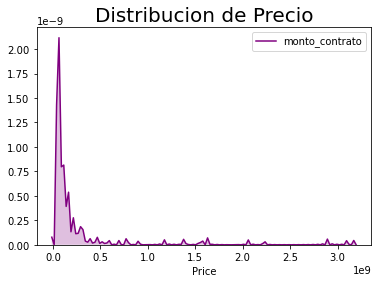

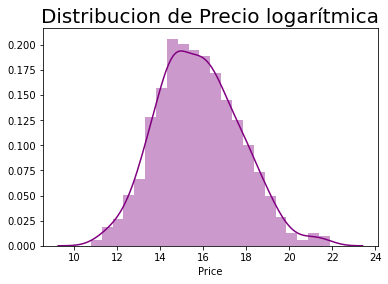

In [71]:
# Vamos a graficar esto, ya sabemos que varios samples no tienen el valor del contrato
# Una de las cosas que buscamos es estimar el monto, si no lo tienen no me sirve
# Borramos los que no tengan monto :o

obras_cleaned.dropna(subset=['monto_contrato'], how='any', inplace=True, axis='index')
filas = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas}')

sns.kdeplot(obras_cleaned.monto_contrato, color="purple", shade = True)
plt.xlabel("Price")
plt.title('Distribucion de Precio',size = 20)
plt.show()

# Plot Log-Precio
sns.distplot(np.log(1+obras_cleaned['monto_contrato']),color='purple')
plt.xlabel("Price")
plt.title('Distribucion de Precio logarítmica',size = 20)
plt.show()

# Facherito el segundo

### Barrio

In [74]:
# Analizamos la cantidad de valores únicos en el feature de barrio
barrio = len(obras_cleaned['barrio'].unique()) 
print(f'En total hay {barrio} barrios en el análisis.\r\n')
print("\n", obras_cleaned['barrio'].unique())

En total hay 53 barrios en el análisis.


 ['Villa Urquiza' 'Montserrat' 'San Nicolás' 'Villa Soldati' 'Villa Lugano'
 'Villa Riachuelo' 'Puerto Madero' 'Recoleta' 'Liniers' 'Coghlan'
 'La Boca' 'Belgrano' 'Parque Patricios' 'Barracas' 'Palermo' 'Saavedra'
 'Villa Del Parque' 'Almagro' 'Villa Devoto' 'Villa Pueyrredon'
 'Agronomía' 'San Cristóbal' 'Balvanera' 'Flores' 'Villa Luro' 'Chacarita'
 'Mataderos' 'Paternal' 'Caballito' 'Monte Castro' 'Floresta'
 'Parque Avellaneda' 'Parque Chacabuco' 'Retiro' 'Constitución'
 'Villa Gral. Mitre' 'Boedo' 'Nuñez' 'Villa Crespo' 'Colegiales'
 'Villa del Parque' 'San Telmo' 'Nueva Pompeya' 'Vélez Sarsfield'
 'Villa Santa Rita' 'Versalles' 'Villa Real' 'Parque Chas' nan 'Boca'
 'Monserrat' 'Marcos Paz' 'Villa Ortúzar']


In [77]:
# Algún mono escribió mal (montserrat)
# Villa del Parque está repetido por una mayúscula
# A alguien le salió el turro y puso LA BOCA y otro solo Boca


def clean_row(row):
    a= ['La Boca','Boca']
    b= ['Montserrat','Monserrat']
    c= ['Villa Del Parque','Villa del Parque']
    
    if row.barrio in a:
        return 'La Boca'
    if row.barrio in b:
        return 'Monserrat'
    if row.barrio in c:
        return 'Villa del Parque'
    return row.barrio

def clean_df(obras_cleaned):
    obras_cleaned=obras_cleaned.copy()
    obras_cleaned['barrio']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras_cleaned)
print(obras_cleaned.barrio.unique())


['Villa Urquiza' 'Monserrat' 'San Nicolás' 'Villa Soldati' 'Villa Lugano'
 'Villa Riachuelo' 'Puerto Madero' 'Recoleta' 'Liniers' 'Coghlan'
 'La Boca' 'Belgrano' 'Parque Patricios' 'Barracas' 'Palermo' 'Saavedra'
 'Villa del Parque' 'Almagro' 'Villa Devoto' 'Villa Pueyrredon'
 'Agronomía' 'San Cristóbal' 'Balvanera' 'Flores' 'Villa Luro' 'Chacarita'
 'Mataderos' 'Paternal' 'Caballito' 'Monte Castro' 'Floresta'
 'Parque Avellaneda' 'Parque Chacabuco' 'Retiro' 'Constitución'
 'Villa Gral. Mitre' 'Boedo' 'Nuñez' 'Villa Crespo' 'Colegiales'
 'San Telmo' 'Nueva Pompeya' 'Vélez Sarsfield' 'Villa Santa Rita'
 'Versalles' 'Villa Real' 'Parque Chas' nan 'Marcos Paz' 'Villa Ortúzar']


In [79]:
# Hay algunos NaNs también, se van

obras_cleaned.dropna(subset=['barrio'], how='any', inplace=True, axis='index')
filas2 = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas2}')

# Teníamos 1047, así que se fueron solo 5, está bien, no fue tan grave

Filas: 1042


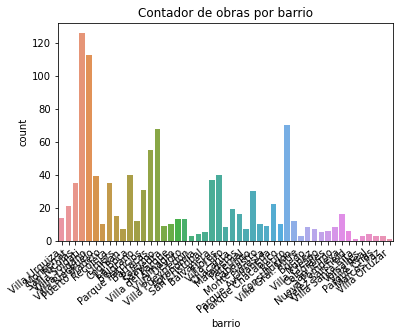

In [81]:
# Probamos visualizar

ax = sns.countplot(x='barrio', data=obras_cleaned)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Contador de obras por barrio")
plt.show()

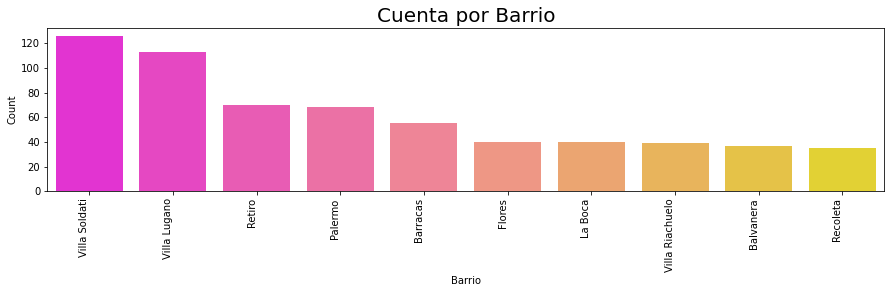

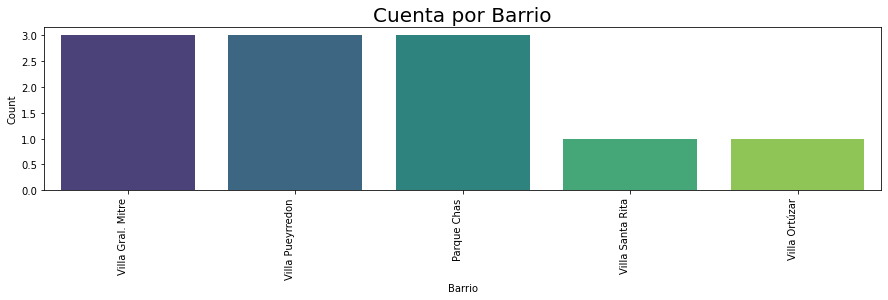

In [141]:
# Fuck, son muchas

top = obras_cleaned['barrio'].value_counts().index[0:10]


plt.figure(figsize=(15,3))
g = sns.countplot(x='barrio',
                  data=obras_cleaned, 
                  palette = 'spring',
                  order=top)
g.set_xticklabels(g.get_xticklabels(), 
                  rotation=90, 
                  ha="right")
plt.title('Cuenta por Barrio',size = 20)
plt.xlabel('Barrio')
plt.ylabel('Count')
plt.show()

# A ver qué onda con los más bajos

bottom = obras_cleaned['barrio'].value_counts().index[43:53]
plt.figure(figsize=(15,3))
h = sns.countplot(x='barrio',
                  data=obras_cleaned, 
                  palette = 'viridis',
                  order=bottom)
h.set_xticklabels(h.get_xticklabels(), 
                  rotation=90, 
                  ha="right")
plt.title('Cuenta por Barrio',size = 20)
plt.xlabel('Barrio')
plt.ylabel('Count')
plt.show()

# MMMMM 2 barrios con sólo una obra, creo que nos va a arruinar el accuracy, pruebo con comuna

### Comunas

In [84]:
# Analizamos la cantidad de valores únicos en la feature de comuna
# Guarda, estoy tomando el obras_cleaned de antes, si no tomamos barrio hay que anular las líneas!!!

comuna = len(obras_cleaned['comuna'].unique()) 
print(f'En total hay {comuna} comunas en el análisis.\r\n')
print("\n", obras_cleaned['comuna'].unique())

En total hay 16 comunas en el análisis.


 [12.  1.  8.  2.  9.  4. 13. 14. 11.  5. 15.  3.  7. 10.  6. nan]


In [85]:
# La diferencia entre barrio y comuna era un NaN (al ppio del notebook)
# Lo voy a sacar y rezar que sea ese solito y no haya borrado nada más

obras_cleaned.dropna(subset=['comuna'], how='any', inplace=True, axis='index')
filas3 = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas3}')

# No, saqué de más, si vamos con comunas hay que modificar esto!!!!!

Filas: 1039


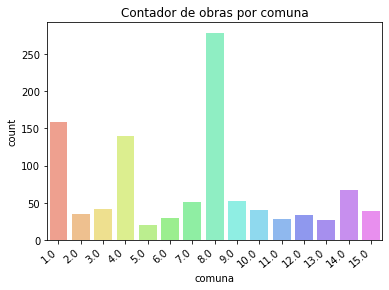

In [149]:
ax = sns.countplot(x='comuna', 
                   data=obras_cleaned,
                   palette='gist_rainbow',
                   alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Contador de obras por comuna")
plt.show()

### Latitud y longitud 

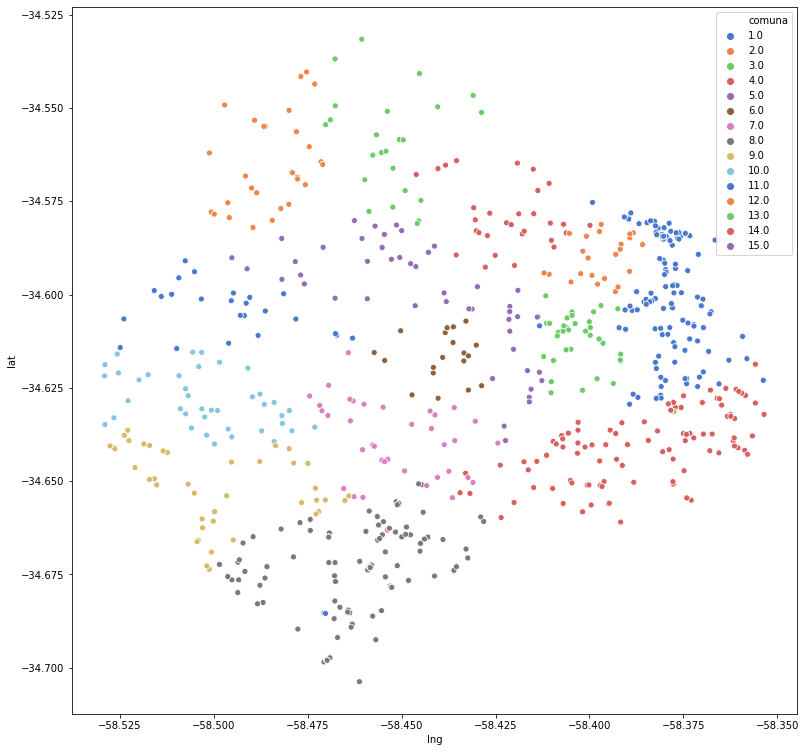

In [168]:
# Probanding plotear en mapa, sólo para esto

#obras_cleaned.plot(kind='scatter', 
                   #x='lng', 
                   #y='lat', 
                   #cmap=plt.get_cmap(), 
                   #colorbar=True, 
                   #alpha=0.5, 
                   #figsize=(10,8))
#plt.show()

# El primer gráfico me pareció medio feo, se pueden sacar los # y verlo, pero al pedo

plt.figure(figsize=(13,13))
sns.scatterplot(x=obras_cleaned.lng,
                y=obras_cleaned.lat,
                hue=obras_cleaned.comuna,
                palette='muted')
plt.show()

# Podríamos buscar alguna etiqueta mejor para la comuna

## Ahora a buscar si están relacionados los features

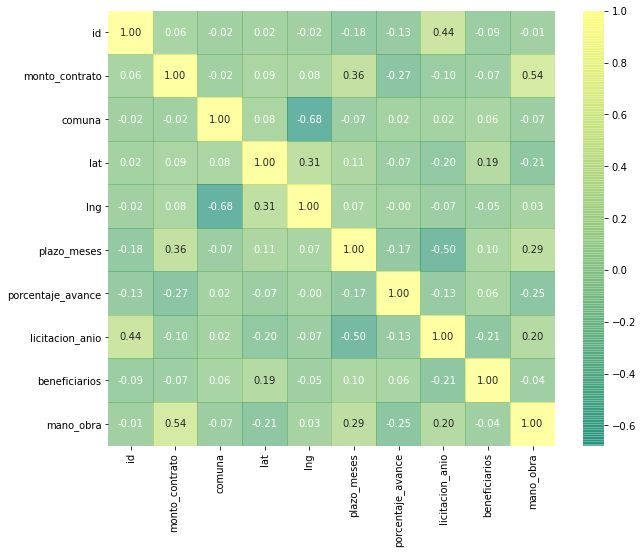

In [199]:
# Matriz de correlación para ver si son lineales
corr = obras_cleaned.corr()

fig, ax = plt.subplots(figsize=(10, 8))
#Permitimos anotaciones y numeros (float) sobre el mapa
sns.heatmap(corr, cmap='summer', annot=True, fmt=".2f", alpha=0.6)

plt.show()
# Monto contrato - meses
# Monto contrato - mano de obra

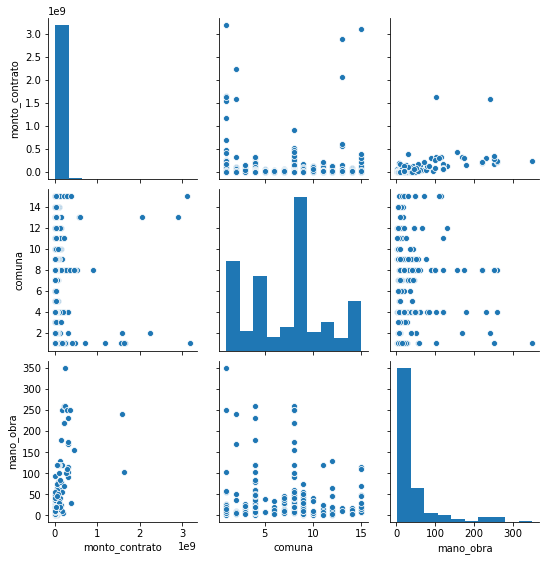

In [214]:
graf=obras_cleaned.loc[:,['etapa','tipo', 'monto_contrato','comuna', 'barrio','mano_obra']]

sns.pairplot(data=graf)
plt.show()

# los valores string no me van a traer nada.. tendría que convertirlos en dummies